In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [3]:
sns.set(style='whitegrid')

In [9]:
df = pd.read_csv(r"C:\Users\sdshe\Downloads\Black-Friday-Sales-Prediction-master\Black-Friday-Sales-Prediction-master\Data\BlackFridaySales.csv")

In [11]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (550068, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory us

In [13]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [15]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

User_ID: 5891 unique values
Product_ID: 3631 unique values
Gender: 2 unique values
Age: 7 unique values
Occupation: 21 unique values
City_Category: 3 unique values
Stay_In_Current_City_Years: 5 unique values
Marital_Status: 2 unique values
Product_Category_1: 20 unique values
Product_Category_2: 17 unique values
Product_Category_3: 15 unique values
Purchase: 18105 unique values


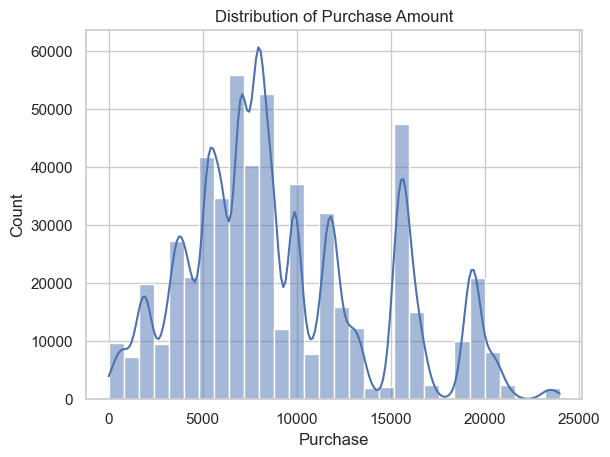

In [17]:
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()

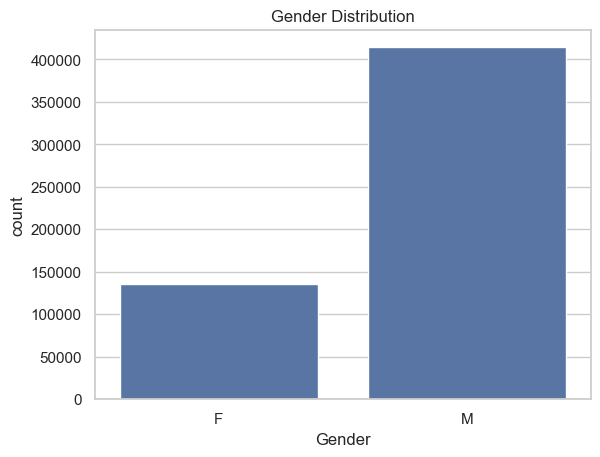

In [19]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

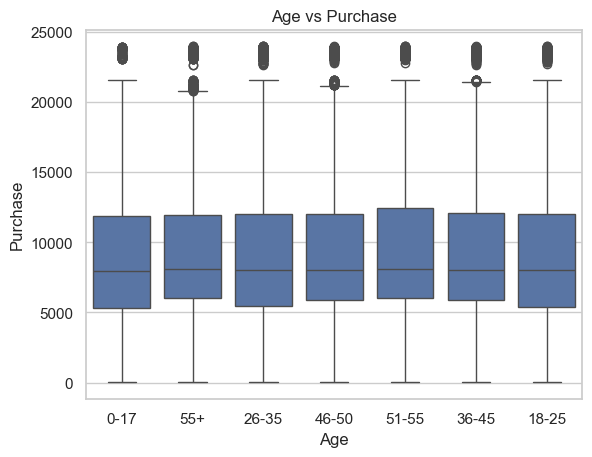

In [21]:
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title("Age vs Purchase")
plt.show()

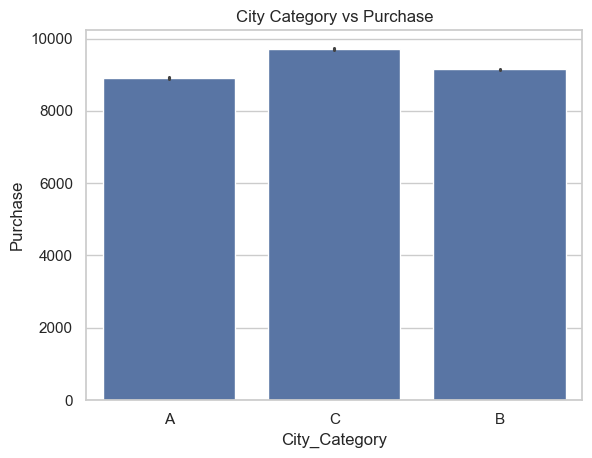

In [24]:
sns.barplot(x='City_Category', y='Purchase', data=df)
plt.title("City Category vs Purchase")
plt.show()

In [26]:
for col in ['Product_Category_2', 'Product_Category_3']:
    df[col].fillna(0, inplace=True)

C:\Users\sdshe\AppData\Local\Temp\ipykernel_27404\3514232647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


In [28]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['City_Category'] = le.fit_transform(df['City_Category'])
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'], drop_first=True)

In [30]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [32]:
X = df.drop('Purchase', axis=1)
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression RMSE: 4618.668481370481


In [38]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge RMSE: 4618.66847369804


In [40]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso RMSE: 4618.66871127313


In [42]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree RMSE: 2972.0989257692318


In [51]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest RMSE: 2955.7632393987237


In [45]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

Gradient Boosting RMSE: 2942.649987538461


In [49]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, objective='reg:squarederror')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBoost RMSE: 2922.923658614809


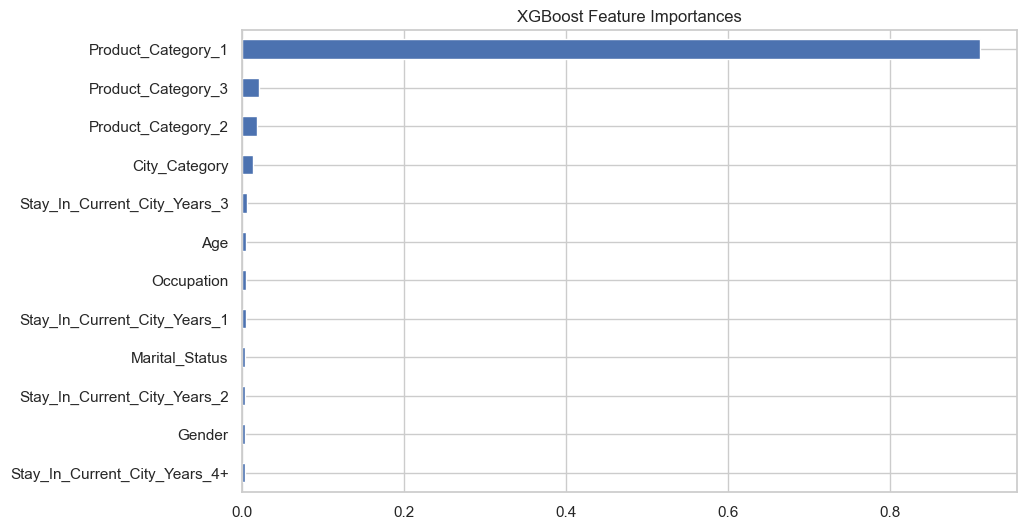

In [53]:
importances = pd.Series(xgb.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title("XGBoost Feature Importances")
plt.show()


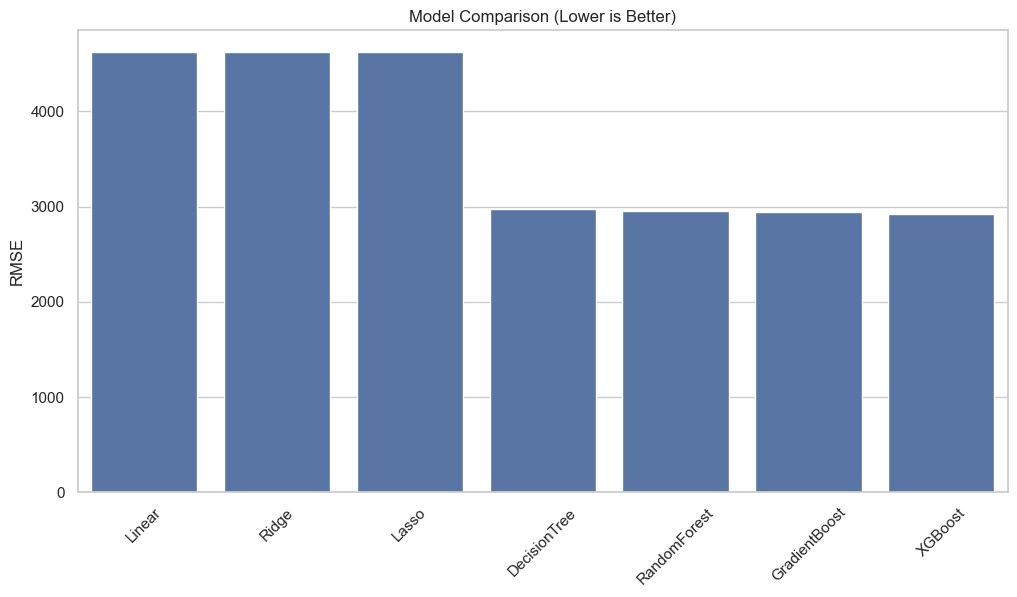

In [56]:
models = ['Linear', 'Ridge', 'Lasso', 'DecisionTree', 'RandomForest', 'GradientBoost', 'XGBoost']
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test, y_pred_gb)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb))
]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=rmse_scores)
plt.ylabel("RMSE")
plt.title("Model Comparison (Lower is Better)")
plt.xticks(rotation=45)
plt.show()
